## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = study_results.merge(mouse_metadata, how='outer', on=["Mouse ID"])


# Display the data table for preview
mouse_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mice_total = mouse_results["Mouse ID"].count()
mice_total

1893

In [3]:
mouse_results.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mice = mouse_results[mouse_results.duplicated(['Mouse ID', 'Timepoint'])] 
duplicate_mice
  

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mouse_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_total = clean_mice["Mouse ID"].count()
new_mice_total

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_data = clean_mice.groupby(["Drug Regimen"])
mean_regimen = regimen_data["Tumor Volume (mm3)"].mean()
median_regimen = regimen_data["Tumor Volume (mm3)"].median()
variance_regimen = regimen_data["Tumor Volume (mm3)"].var()
std_regimen = regimen_data["Tumor Volume (mm3)"].std()
sem_regimen = regimen_data["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.
regimen_stats = pd.DataFrame({"Mean": mean_regimen, 
                                    "Median": median_regimen,
                                    "Variance": variance_regimen,
                                    "SD": std_regimen, "SEM": sem_regimen,})
regimen_stats



,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regimen_df = clean_mice.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
regimen_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

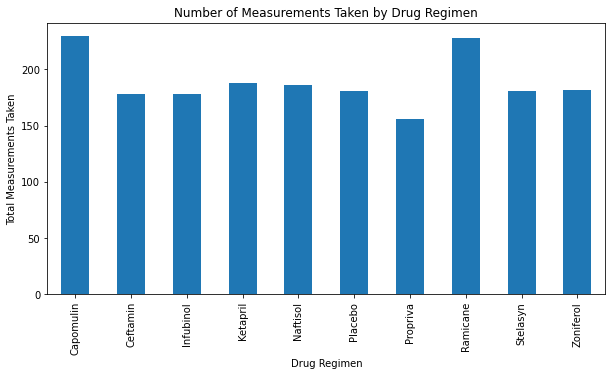

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#regimen_data = clean_mice.groupby(["Drug Regimen"])
drug_measurements = regimen_data["Tumor Volume (mm3)"].count()
measurements_chart = drug_measurements.plot(kind='bar', figsize=(10,5))

# Set the xlabel and ylabel 
measurements_chart.set_xlabel("Drug Regimen")
measurements_chart.set_ylabel("Total Measurements Taken")
measurements_chart.set_title("Number of Measurements Taken by Drug Regimen")


plt.show()
plt.tight_layout()


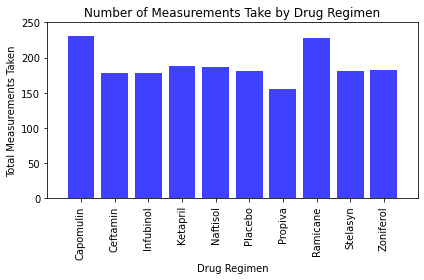

In [10]:
# # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_measurements))
measurements = regimen_data["Tumor Volume (mm3)"].count()
plt.bar(x_axis, measurements, color='b', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propiva",
                           "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical')

plt.xlim(-1, len(x_axis))
plt.ylim(0, 250)
plt.title("Number of Measurements Take by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements Taken")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Number of Mice by Gender')

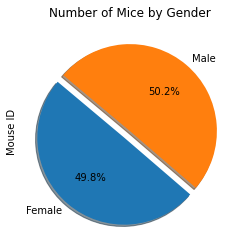

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = clean_mice.groupby(["Sex"])
mice_gender = gender_data['Mouse ID'].nunique()
explode = (.1, 0)
gender_chart = mice_gender.plot(kind='pie', startangle=140, autopct="%1.1f%%", explode=explode, shadow=True)
gender_chart.set_title("Number of Mice by Gender")


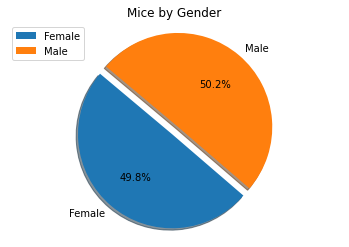

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = clean_mice.groupby(["Sex"])
mice_gender = gender_data['Mouse ID'].nunique()
explode = (.1, 0)
labels = ["Female", "Male"]
plt.pie(mice_gender, autopct="%1.1f%%", shadow=True, startangle=140, explode=explode, labels=labels)
plt.title("Mice by Gender")
plt.axis("equal")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
top_regimens = clean_mice[clean_mice["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_regimens

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [14]:

# Start by getting the last (greatest) timepoint for each mouse

tumor_data = top_regimens.groupby(["Mouse ID"])
last_timepoint = tumor_data.max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_data = last_timepoint.merge(clean_mice, how='inner', on=["Mouse ID", "Timepoint"])
clean_data = combined_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)_y", "Drug Regimen_y"]]
clean_data = clean_data.rename(columns={"Tumor Volume (mm3)_y": "Final Tumor Volume", "Drug Regimen_y":"Drug Regimen"})
clean_data

,Mouse ID,Timepoint,Final Tumor Volume,Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = clean_data["Final Tumor Volume"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Final Tumor Volume is: {lowerq}")
print(f"The upper quartile of Final Tumor Volume is: {upperq}")
print(f"The interquartile range of Final Tumor Volume is: {iqr}")
print(f"The the median of Final Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outliers = clean_data.loc[(clean_data["Final Tumor Volume"] < lower_bound) | (clean_data["Final Tumor Volume"] > upper_bound)]
outliers
  
    

The lower quartile of Final Tumor Volume is: 37.187743802499995
The upper quartile of Final Tumor Volume is: 59.930261755000004
The interquartile range of Final Tumor Volume is: 22.74251795250001
The the median of Final Tumor Volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Mouse ID,Timepoint,Final Tumor Volume,Drug Regimen


In [17]:
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_volume_data = clean_data.groupby("Drug Regimen")["Final Tumor Volume"].apply(list)
tumor_data_df = pd.DataFrame(tumor_volume_data)

#for each tumor in treatments
tumor_volume_df = tumor_data_df.reindex(treatments)
 
tumor_volume = [vol for vol in tumor_volume_df["Final Tumor Volume"]]


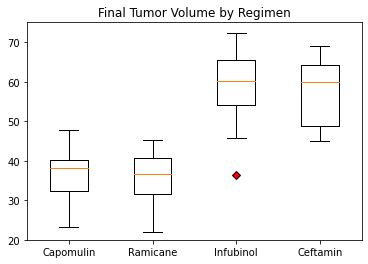

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier = dict(markerfacecolor='r', marker='D')
plt.boxplot(tumor_volume, labels=treatments, flierprops=outlier)
plt.title("Final Tumor Volume by Regimen")
plt.ylim(20, 75)
plt.show()

## Line and Scatter Plots

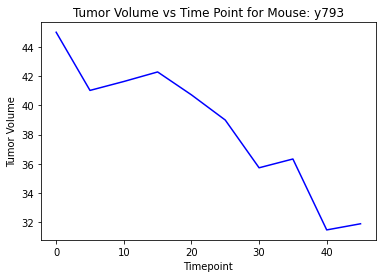

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
y793 = clean_mice[clean_mice["Mouse ID"].isin(["y793"])]
plt.plot(y793["Timepoint"], y793["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume vs Time Point for Mouse: y793")
plt.show()

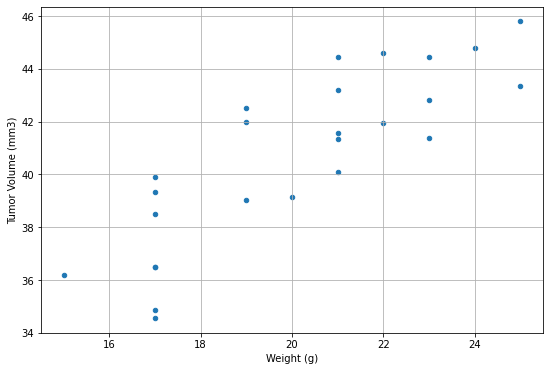

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo = top_regimens[top_regimens["Drug Regimen"].isin(["Capomulin"])]
capo_group = capo.groupby("Mouse ID").mean()
capo_group_df = pd.DataFrame(capo_group).reset_index()
capo_scatter = capo_group_df.plot(kind="scatter", x ="Weight (g)", y="Tumor Volume (mm3)", grid = True, figsize= (9,6))
               
                

## Correlation and Regression

The r-squared is: 0.7088568047708717


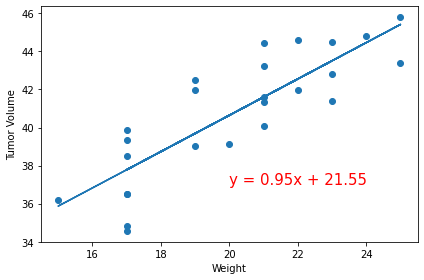

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_group_df["Weight (g)"]
y_values = capo_group_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values)
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.show()

In [40]:
print(rvalue)

0.8419363424694718
